# My python assignment
Sepehr Hejazi


In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd


The following cell is a user-defined function that gets a fasta file and returns a dictionary of species name as the first element, and the sequence as the second element of the dictionary.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)


lets import the fasta file with the just written function

In [17]:
fasta_di= get_sequences_from_file("penguins_cytb.fasta")

The next cell is a function that translates a DNA sequence to the corresponding polypeptide. 

In [33]:
def translate_function(string_nucleotides): 
    aa_seq_string= ""
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon == "AGA" or codon == "AGG" or codon == "TAA" or codon == "TAG" :
            break
        else :
            aa_seq_string = aa_seq_string + mito_table.forward_table[codon]
    return(aa_seq_string)

Just chekcking if it works

In [34]:
for seq in fasta_di.values():
    print(translate_function(seq))

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLL

Alternative: 

In [37]:
from Bio.Seq import Seq
def alt_translate_function(string_nucleotides): 
    aa_seq_string = string_nucleotides.translate()
    return(aa_seq_string)

Just chekcking if it works (* is a stop codon)

In [43]:
 for seq in fasta_di.values():
        print(seq.translate())
        print("next")

MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLMATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWT*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTIAFRPLSQLLF*ALVANLIILT*VGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKILNH*
next
MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLIATAFVGYVLPWGQISF*GATVITNLFSAIPYIGQTLVE*A*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTITFRPLSQLLF*TLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKILNH*
next
MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGLYYGSYLYKET*NTGIILLLTLIATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWA*GGFSVDNPTLTRFFTLHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYS

MW calculator function:

In [47]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    protein = ProteinAnalysis(aa_seq)
    mw = protein.molecular_weight()
    return(mw)    

check this: 

In [56]:
 for seq in fasta_di.values():
        print(compute_molecular_weight(translate_function(seq)))


42459.602100000004
42563.70669999999
42475.5753
42445.54929999999
42475.5753
42491.64080000001
42458.61400000001
42404.54230000001
42595.87590000001
42431.54900000002
42399.55200000001
42459.60210000002


GC content calculator: 

In [75]:
from Bio.Seq import Seq
def GC_calc (seq) :
    Gs = seq.count("G")
    Cs = seq.count("C")
    
    gc = (Gs + Cs) / len(seq) *100

 
    return(gc)

In [76]:
#check that:
for seq in fasta_di.values():
    print(GC_calc (seq))
   


48.38145231846019
49.69378827646544
51.181102362204726
50.91863517060368
50.83114610673666
49.256342957130364
49.08136482939632
47.76902887139108
47.15660542432196
48.29396325459317
49.256342957130364
48.20647419072616


# main

In [77]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [78]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [99]:
#adding two columns of GC content and MW to it.
import numpy as np
gc_contents=[]
MW_contents= []
for species in penguins_df.species:
    gc_contents.append(GC_calc(fasta_di[species]))
    MW_contents.append(compute_molecular_weight(translate_function(fasta_di[species])))
    
    
penguins_df['MW']=MW_contents
penguins_df['GC%']=gc_contents    

In [100]:
penguins_df

,species,mass,MW,GC%
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


Now lets do the plotting


<Axes: title={'center': 'Such a Nice Plot'}, xlabel='species'>

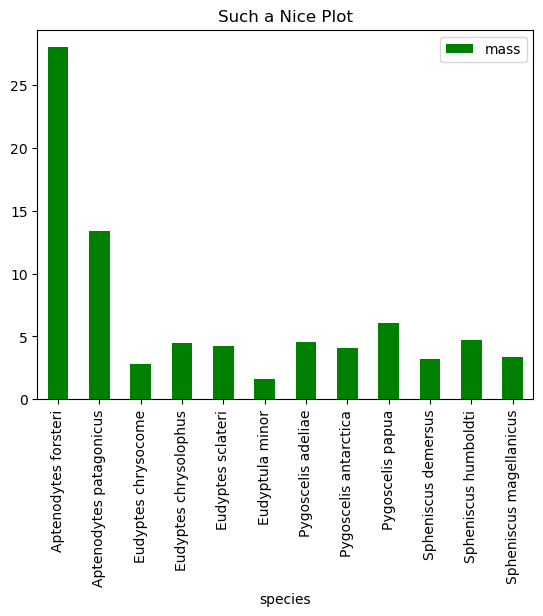

In [104]:

penguins_df.plot(kind='bar', x='species', y='mass', color='green', title='Such a Nice Plot')


# *Q1* What is the smallest penguin species? Eudyptula minor
# *Q2* What is the geographical range of this species?  Australia and New Zealand !!!! 


Lat but not least

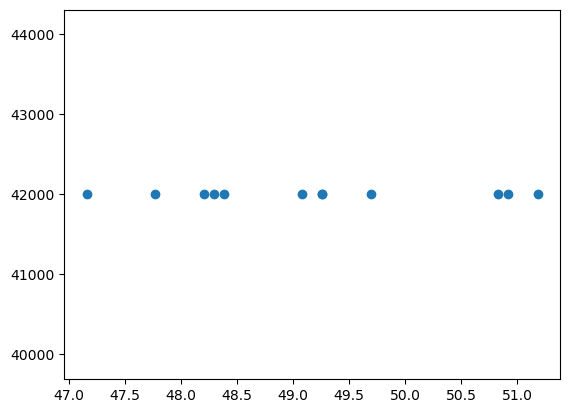

In [106]:
import matplotlib.pyplot as plt
plt.scatter(penguins_df['GC%'], penguins_df['MW'])